### In this we will actually start with the ML algorithms

#### We will be applying few of the ML algos as specified
1. Linear Regressor
2. Lasso Regressor
3. Decision Tree
4. KNN
5. Ensemble: RandomForest,XGBoost
6. HyperParam tunning

#### Apply Deep Neural Networks as well
1. ANN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [3]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [4]:
df.head(10)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
5,16.0,25.2,10.0,1013.2,79.0,0.6,4.8,11.1,285.225000
6,13.4,21.0,9.2,1015.1,87.0,0.5,1.5,7.6,236.825000
7,14.3,22.6,6.6,1016.3,76.0,0.8,0.4,3.5,276.908333
8,12.7,18.9,7.3,1021.2,76.0,1.8,6.1,16.5,108.000000
9,11.9,18.9,6.3,1020.1,76.0,1.1,8.3,20.6,107.625000


In [5]:
df.isnull().sum()#Check for null vals

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

##### Here we can see that one one value is actually missing which isnt much so we can use mean/median but we can drop it as well.Here lets do median

In [6]:
df['PM 2.5'].fillna(df['PM 2.5'].median(),inplace=True)

In [7]:
df.isnull().sum()# check again now for null

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

#### Great there was only one null val because while scrapping we made sure that the values are not null or null category type

In [61]:
#lets divide data in two features x,y which is independent,dependent
x=df.iloc[:,:-1]
y=df.iloc[:,-1]#-1 gives last column

In [9]:
x,y

(        T    TM    Tm     SLP     H   VV     V    VM
 0     7.4   9.8   4.8  1017.6  93.0  0.5   4.3   9.4
 1     7.8  12.7   4.4  1018.5  87.0  0.6   4.4  11.1
 2     6.7  13.4   2.4  1019.4  82.0  0.6   4.8  11.1
 3     8.6  15.5   3.3  1018.7  72.0  0.8   8.1  20.6
 4    12.4  20.9   4.4  1017.3  61.0  1.3   8.7  22.2
 ..    ...   ...   ...     ...   ...  ...   ...   ...
 726  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9
 727  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2
 728  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8
 729  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5
 730  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3
 
 [731 rows x 8 columns],
 0      219.720833
 1      182.187500
 2      154.037500
 3      223.208333
 4      200.645833
           ...    
 726    288.416667
 727    256.833333
 728    169.000000
 729    186.041667
 730    185.583333
 Name: PM 2.5, Length: 731, dtype: float64)

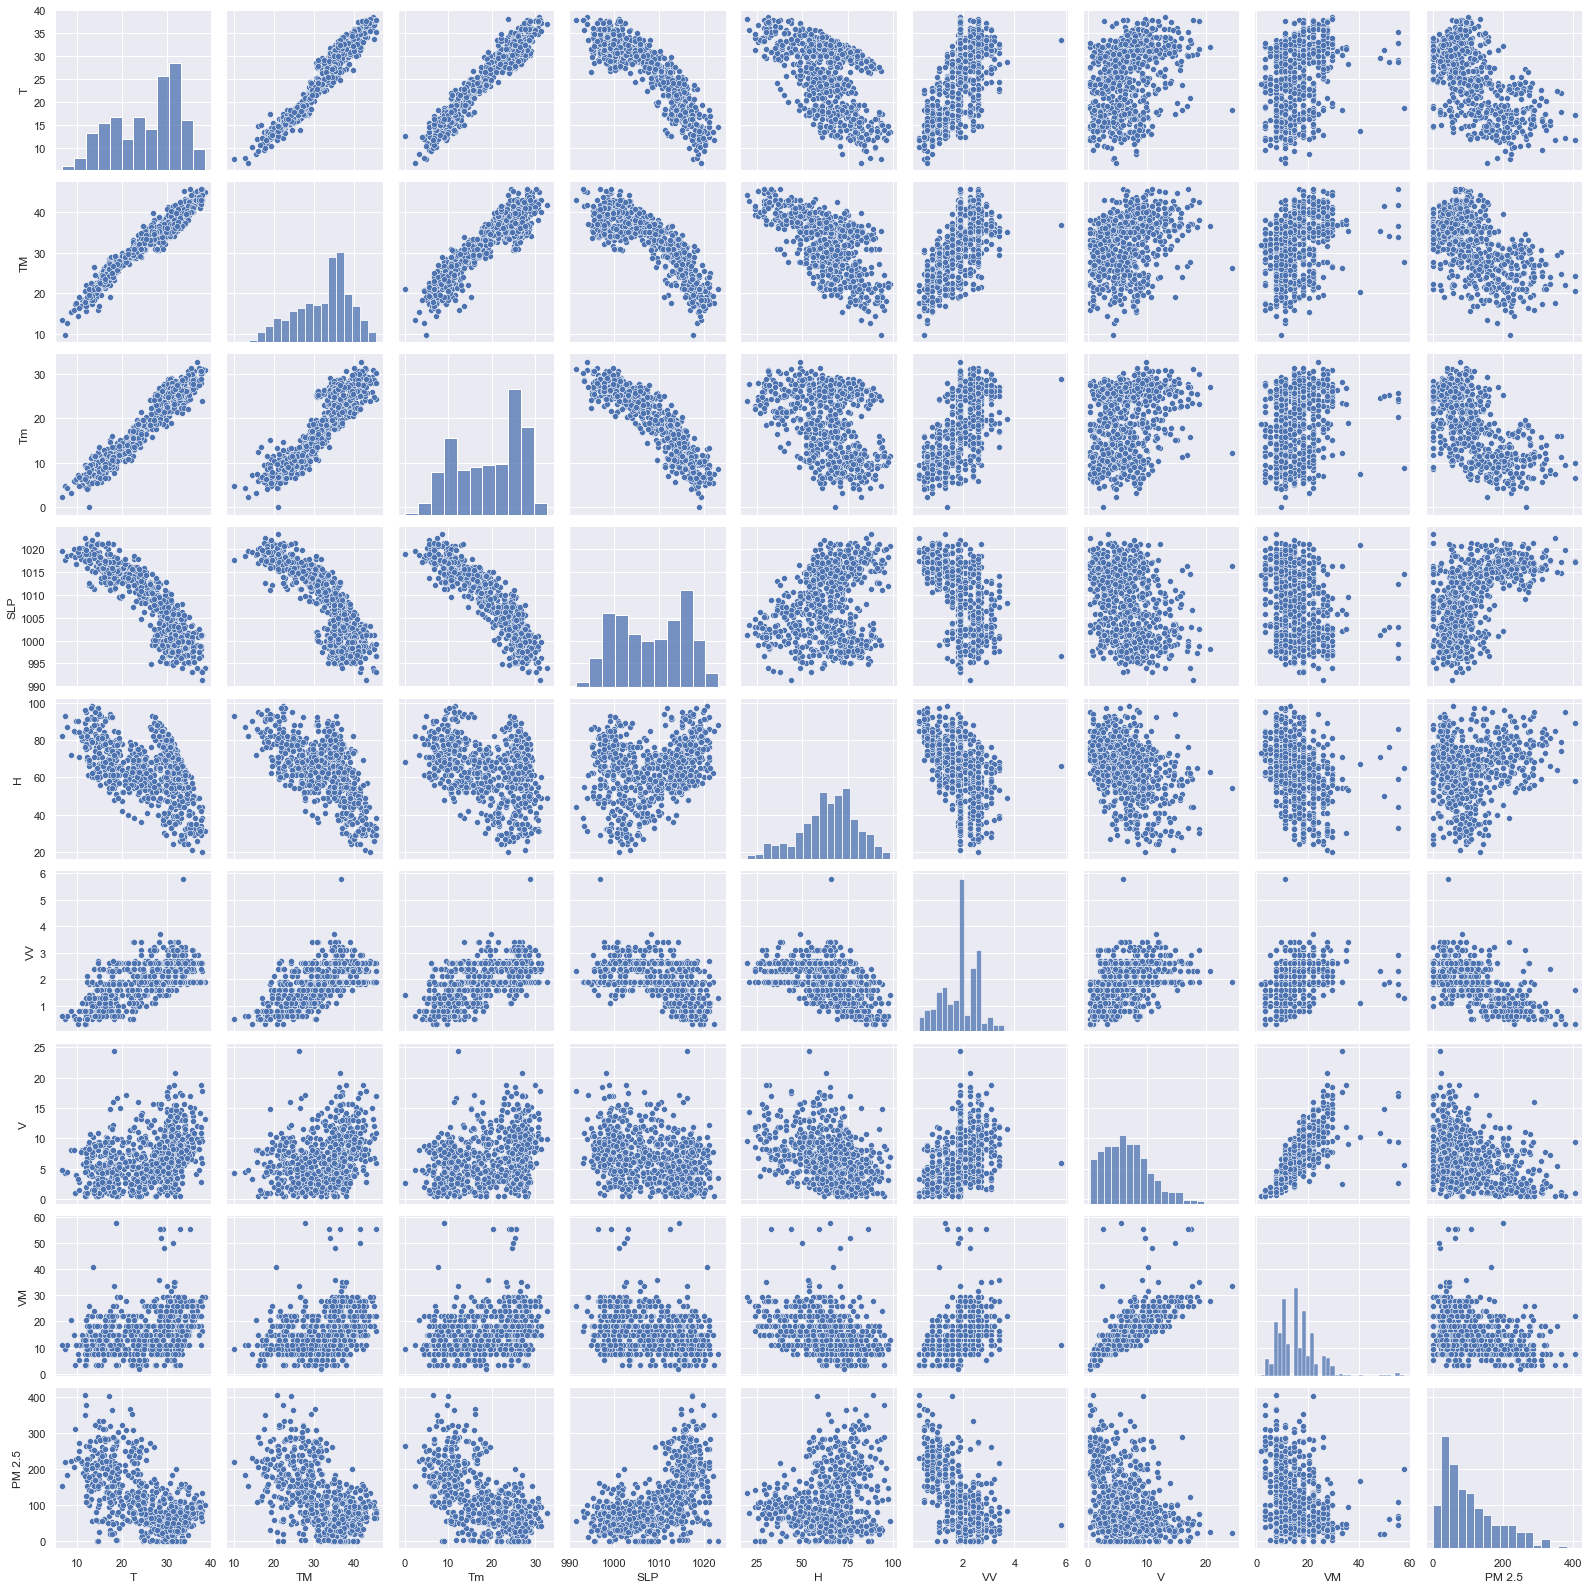

In [25]:
#lets make a pairplot
sns.pairplot(df)#making the plot 

In [10]:
#so we saw few plots which had correlations and some which did not however better way to see this is with df.corr
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967323,0.958872,-0.884778,-0.520629,0.622441,0.326463,0.287869,-0.626592
TM,0.967323,1.000000,0.896628,-0.829935,-0.601433,0.598028,0.320478,0.300257,-0.567100
Tm,0.958872,0.896628,1.000000,-0.909582,-0.317057,0.560399,0.313298,0.260067,-0.667945
SLP,-0.884778,-0.829935,-0.909582,1.000000,0.277007,-0.491837,-0.346481,-0.300552,0.613748
H,-0.520629,-0.601433,-0.317057,0.277007,1.000000,-0.475249,-0.399293,-0.371552,0.173528
VV,0.622441,0.598028,0.560399,-0.491837,-0.475249,1.000000,0.403044,0.347714,-0.628315
V,0.326463,0.320478,0.313298,-0.346481,-0.399293,0.403044,1.000000,0.760858,-0.354522
VM,0.287869,0.300257,0.260067,-0.300552,-0.371552,0.347714,0.760858,1.000000,-0.283344
PM 2.5,-0.626592,-0.567100,-0.667945,0.613748,0.173528,-0.628315,-0.354522,-0.283344,1.000000


<AxesSubplot:>

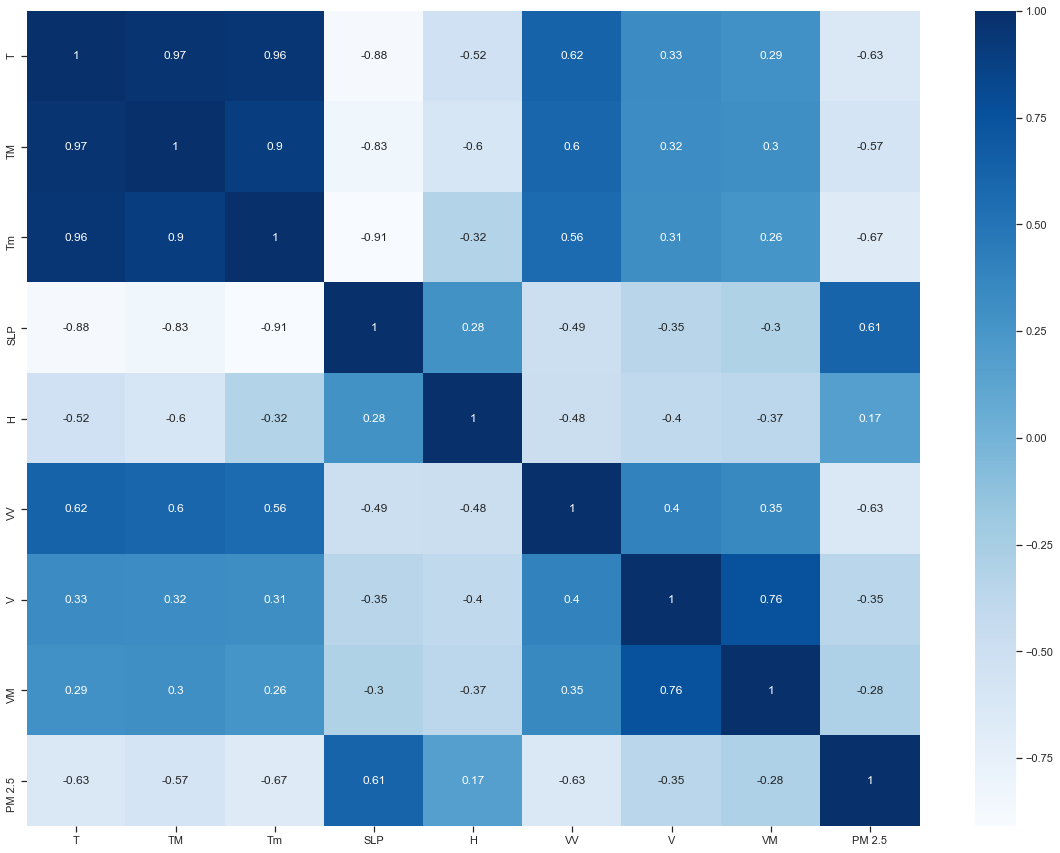

In [11]:
#lets see this on a heatmap now
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

#### So here we can actually see good corr and few corrs which are not high values this also says how the features are with each other

In [36]:
#Now lets look at the features and gain some more information
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(random_state=0,n_jobs=-1)
etr.fit(x,y)

ExtraTreesRegressor(n_jobs=-1, random_state=0)

In [37]:
etr.feature_importances_#these values are with respect to the o/p feature where it defines how the features like t,tm,..are affecting or collaborating 

array([0.16223462, 0.08918704, 0.16892198, 0.13174655, 0.08630674,
       0.27197002, 0.05111364, 0.03851941])

In [38]:
##Lets plot the values
ImpFeatures=pd.Series(etr.feature_importances_,index=df.columns[:-1])

In [39]:
ImpFeatures.sort_values(ascending=False,inplace=True)

<AxesSubplot:>

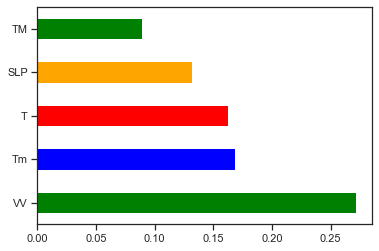

In [41]:
ImpFeatures.nlargest(5).plot.barh(color=['green','blue','red','orange'])

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

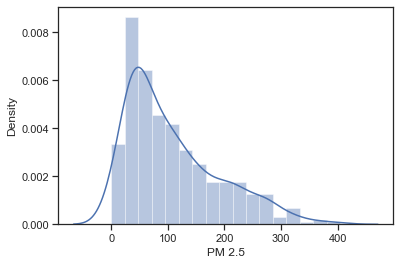

In [45]:
sns.distplot(y)

#### Now we can see that our data dependent feature is a bit skwed to the right.

In [62]:
#The train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [63]:
x_test.shape

(183, 8)

In [64]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)

In [66]:
x_test=scaler.transform(x_test)

In [67]:
regressor.fit(x_train,y_train)

LinearRegression()

In [68]:
print("Coefficient of Determination r^2 <---- on train set {}".format(regressor.score(x_train,y_train)))

Coefficient of Determination r^2 <---- on train set 0.6032535952290731


In [69]:
print("Coefficient of Determination r^2 <---- on train set {}".format(regressor.score(x_test,y_test)))

Coefficient of Determination r^2 <---- on train set 0.501577164862414


In [70]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

In [71]:
score.mean()

0.4670509094051126

##### This is not a good fit at all

In [72]:
regressor.coef_

array([  80.62514438,   21.64523794, -231.79905094,   28.26082535,
        -54.95866539, -276.61601194,  -65.30214461,   12.52239145])

In [73]:
#lets understand the coeff(slopes ... y=mx+c,x is independent features and m is the slope c is the y-intercept)
coeff_df=pd.DataFrame(regressor.coef_,index=x.columns,columns=['Coefficient'])

In [74]:
coeff_df

,Coefficient
T,80.625144
TM,21.645238
Tm,-231.799051
SLP,28.260825
H,-54.958665
VV,-276.616012
V,-65.302145
VM,12.522391


Interpreting the coefficients:
  1. Holding all other features fixed, if a unit increase in T is associated with an 'Increase of 80.625 in PM 2.5'
  2. Holding all other features fixed, if a unit increase in Tm is associated with an 'Decrease of -231.8 in PM 2.5'

In [75]:
y_pred=regressor.predict(x_test)

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

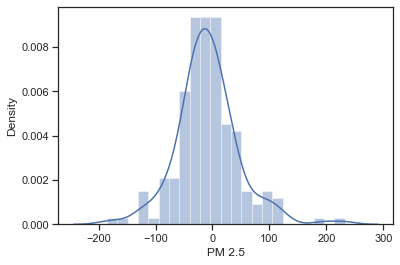

In [76]:
sns.distplot(y_test-y_pred)

##### Almost bell curve is a good result.

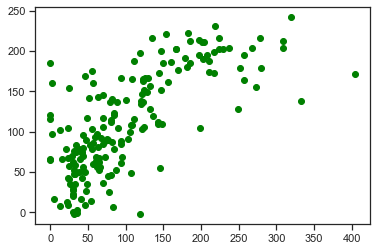

In [78]:
#Lets see the scattter plot if there is a linear increase then it mean its almost normal distribution
plt.scatter(y_test,y_pred,color='green')

##### Why is it important to test the normality of a distribution?
Ans:For the continuous data, test of the normality is an important step for deciding the measures of central tendency and statistical methods for data analysis. When our data follow normal distribution, parametric tests otherwise nonparametric methods are used to compare the groups.

In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [80]:
print('MAE is :{}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE is :{}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE is :{}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

MAE is :40.25180633277553
MSE is :3101.8095465712454
RMSE is :55.69389146550316


In [81]:
import pickle
file=open('linear_regression.pkl','wb')
pickle.dump(regressor,file)